# EASTD143A: Digitalizing old materials with OCR
Date: 2023-03-23 15:45

Instructor: Kwok-leong Tang


## Install Tesseract OCR
Tesseract OCR documentation: https://tesseract-ocr.github.io/

Open your terminal, paste the following command:

`sudo apt-get update && sudo apt-get install tesseract-ocr && sudo apt-get install -y tesseract-ocr-eng tesseract-ocr-chi-sim tesseract-ocr-jpn tesseract-ocr-kor
`


## Install the required Python libraries:

pytesseract documentation: https://github.com/madmaze/pytesseract
opencv documentation: https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html


In [ ]:
pip install pytesseract opencv-python

In [7]:
# import cv2 and pytesseract

import cv2
import pytesseract

In [2]:
# import matplotlib & pandas
# for matplotlib documentation: https://matplotlib.org/stable/users/index.html
# for pandas documentation: https://pandas.pydata.org/docs/user_guide/index.html

import matplotlib.pyplot as plt
import pandas as pd

In [9]:
# read the image by using cv2.imread()

image = cv2.imread(
    '../data/images/1c_1l_01.png')


In [25]:
# set the langauge variable
# for multiple languages use + sign, e.g. lang = 'eng+chi_tra+chi_sim'

lang = 'eng+chi_tra+chi_sim'

In [26]:
# extract the text and put it in a variable

extracted_text = pytesseract.image_to_string(image, lang=lang)

In [28]:
# print the text

print(extracted_text)

PREFACE TO FIRST EDITION.

‘This Handbook is not meant to be a guide to the Treaties governing
Customs practice. It is meant merely as a guide to the present practice of
the Shanghai Customs. ‘Its first object is to tell a merchant who wishes to

pass goods through the Customs, or transact any other Customs busi
exactly what he has to do. But as the Handbook is also intended for the use
of members of the Customs Service, some of the information given is of
little interest to merchants.

Although the Shanghai Office has used every effort to make the Hand-
book authoritative, it cannot be absolutely guaranteed to be so in every
that may arise, and changes also in practice will inevitab
to time. It should therefore only be accepted by the public as a guide,
though it

All changes of office practice at Shanghai, that seriously affect mer-
chants, are published in Customs Notifications. If, when such a Notifica-
tion is issued, the owner of this Handbook will make the nece:

nes

case

hope

In [29]:
def draw_boxes(image, boxes, color, thickness):
    for box in boxes:
        x, y, w, h = box
        cv2.rectangle(image, (x, y), (x + w, y + h), color, thickness)
    return image

In [31]:
def plot_characters(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)
    original_image = image.copy()

    # Set the language for OCR (e.g., 'chi_sim' for simplified Chinese, 'jpn' for Japanese, 'kor' for Korean)
    lang = "eng"

    # Perform OCR using Tesseract
    extracted_text = pytesseract.image_to_string(image, lang=lang)

    # Get character/word bounding boxes
    boxes = pytesseract.image_to_boxes(image, lang=lang)
    box_list = []

    for b in boxes.splitlines():
        elements = b.split()
        x, y, w, h = int(elements[1]), int(
            elements[2]), int(elements[3]), int(elements[4])
        box_list.append((x, image.shape[0] - y, w - x, y - h))

    # Draw green boxes around each detected character/word
    boxed_image = draw_boxes(original_image, box_list,
                             color=(0, 255, 0), thickness=2)

    # Convert the boxed_image from BGR to RGB
    boxed_image_rgb = cv2.cvtColor(boxed_image, cv2.COLOR_BGR2RGB)

    # Display the boxed image using pyplot
    plt.figure(figsize=(16, 10))
    plt.imshow(boxed_image_rgb)
    plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

    # Print the extracted text
    print("Extracted Text:")
    print(extracted_text)


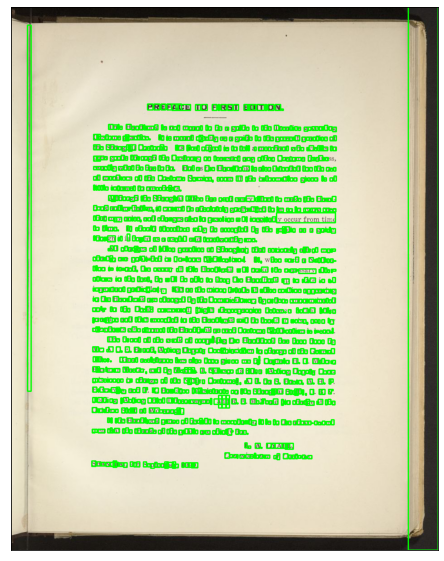

Extracted Text:
PREFACE TO FIRST EDITION.

‘This Handbook is not meant to be a guide to the Treaties governing
Customs practice. It is meant merely as a guide to the present practice of
the Shanghai Customs. ‘Its first object is to tell a merchant who wishes to

pass goods through the Customs, or transact any other Customs busi
exactly what he has to do. But as the Handbook is also intended for the use
of members of the Customs Service, some of the information given is of
little interest to merchants.

Although the Shanghai Office has used every effort to make the Hand-
book authoritative, it cannot be absolutely guaranteed to be so in every
that may arise, and changes also in practice will inevitab
to time. It should therefore only be accepted by the public as a guide,
though it

All changes of office practice at Shanghai, that seriously affect mer-
chants, are published in Customs Notifications. If, when such a Notifica-
tion is issued, the owner of this Handbook will make the nece:


In [32]:
plot_characters('../data/images/1c_1l_01.png')

In [33]:
def confindence_rate(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path)

    # Set the language for OCR (e.g., 'chi_sim' for simplified Chinese, 'jpn' for Japanese, 'kor' for Korean)
    lang = "eng"

    # Perform OCR using Tesseract and obtain character data
    data = pytesseract.image_to_data(
        image, lang=lang, output_type=pytesseract.Output.DATAFRAME)

    # Filter out rows with empty text
    data = data[data['text'].notnull()]

    # Iterate through each row and print the character along with its confidence level
    for index, row in data.iterrows():
        char = row['text']
        conf = row['conf']
        print(f"Character: {char}, Confidence: {conf}")


In [36]:
confindence_rate('../data/images/1c_1l_01.png')

Character:  , Confidence: 95.0
Character: PREFACE, Confidence: 96.542244
Character: TO, Confidence: 95.023712
Character: FIRST, Confidence: 95.023712
Character: EDITION., Confidence: 95.946678
Character: ‘This, Confidence: 76.670807
Character: Handbook, Confidence: 92.625999
Character: is, Confidence: 96.937469
Character: not, Confidence: 96.937469
Character: meant, Confidence: 94.510841
Character: to, Confidence: 96.282181
Character: be, Confidence: 96.282181
Character: a, Confidence: 95.995529
Character: guide, Confidence: 95.995529
Character: to, Confidence: 96.096336
Character: the, Confidence: 96.096336
Character: Treaties, Confidence: 96.738716
Character: governing, Confidence: 96.789078
Character: Customs, Confidence: 96.257378
Character: practice., Confidence: 92.597397
Character: It, Confidence: 92.597397
Character: is, Confidence: 96.887581
Character: meant, Confidence: 96.696304
Character: merely, Confidence: 96.979187
Character: as, Confidence: 96.876587
Character: a, Confi